In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Dataset Definition
df = pd.read_csv('dataset.csv')
df.head()

,Zaman damgası,Cinsiyet,Yaşınız,Kilo Aralığınız,En Çok Vakit Harcadığınız Sosyal Medya,Ne Sıklıkla Dışarıda Yemek Yiyorsunuz / Sipariş Veriyorsunuz,En Sevdiğiniz Renk,En Sevdiğiniz Film Türü,En Çok Dinlediğiniz Müzik Türü,En Sevdiğiniz Yiyecek Türü,En Beğendiğiniz Spor Dalı,Aşağıdakilerden En Çok Gezmek İstediğiniz Ülke / Ülkeler / Kıta
0,2022/05/09 10:29:35 ÖS GMT+3,Erkek,19 - 24,86 - 100,Youtube,Haftanın Her Günü,Kırmızı,Bilim Kurgu / Fantastik,Rock,Hamburger,Futbol,Hollanda
1,2022/05/09 10:32:45 ÖS GMT+3,Kadın,19 - 24,58 - 65,Instagram,Haftada 1 Günden Az,Mor,Komedi,Rock,Hamburger,Tenis / Masa Tenisi,İtalya
2,2022/05/09 10:34:25 ÖS GMT+3,Kadın,19 - 24,51 - 57,Instagram,Haftada 1-3 Gün,Siyah,Bilim Kurgu / Fantastik,Tekno,Pizza,Vücut Geliştirme,Uzakdoğu Ülkeleri
3,2022/05/09 10:35:20 ÖS GMT+3,Erkek,7 - 18,76 - 85,Instagram,Haftada 1 Günden Az,Siyah,Belgesel / Biyografi,Rock,Dünya Mutfağı,Voleybol,İtalya
4,2022/05/09 10:35:45 ÖS GMT+3,Erkek,19 - 24,101+,Youtube,Haftanın Her Günü,Kırmızı,Polisiye / Suç,Rock,Pizza,Basketbol,Hollanda


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Zaman damgası                                                    418 non-null    object
 1   Cinsiyet                                                         418 non-null    object
 2   Yaşınız                                                          418 non-null    object
 3   Kilo Aralığınız                                                  418 non-null    object
 4   En Çok Vakit Harcadığınız Sosyal Medya                           418 non-null    object
 5   Ne Sıklıkla Dışarıda Yemek Yiyorsunuz / Sipariş Veriyorsunuz     418 non-null    object
 6   En Sevdiğiniz Renk                                               418 non-null    object
 7   En Sevdiğiniz Film Türü                              

# **Preprocess**

In [92]:
# change column headers
df = df.rename({'Cinsiyet': 'Gender', 
                'Yaşınız': 'Age',
                'Kilo Aralığınız': 'Weight', 
                'En Çok Vakit Harcadığınız Sosyal Medya': 'Social_Media',
                'Ne Sıklıkla Dışarıda Yemek Yiyorsunuz / Sipariş Veriyorsunuz': 'Order_Freq', 
                'En Sevdiğiniz Renk': 'Color',
                'En Sevdiğiniz Film Türü': 'Movie',
                'En Çok Dinlediğiniz Müzik Türü': 'Music',
                'En Sevdiğiniz Yiyecek Türü': 'Food',
                'En Beğendiğiniz Spor Dalı': 'Sport',
                'Aşağıdakilerden En Çok Gezmek İstediğiniz Ülke / Ülkeler / Kıta': 'Travel',
                }, axis=1)
# Drop illogical data column
df.drop(['Zaman damgası'], axis=1, inplace=True)

df.head()

,Gender,Age,Weight,Social_Media,Order_Freq,Color,Movie,Music,Food,Sport,Travel
0,Erkek,19 - 24,86 - 100,Youtube,Haftanın Her Günü,Kırmızı,Bilim Kurgu / Fantastik,Rock,Hamburger,Futbol,Hollanda
1,Kadın,19 - 24,58 - 65,Instagram,Haftada 1 Günden Az,Mor,Komedi,Rock,Hamburger,Tenis / Masa Tenisi,İtalya
2,Kadın,19 - 24,51 - 57,Instagram,Haftada 1-3 Gün,Siyah,Bilim Kurgu / Fantastik,Tekno,Pizza,Vücut Geliştirme,Uzakdoğu Ülkeleri
3,Erkek,7 - 18,76 - 85,Instagram,Haftada 1 Günden Az,Siyah,Belgesel / Biyografi,Rock,Dünya Mutfağı,Voleybol,İtalya
4,Erkek,19 - 24,101+,Youtube,Haftanın Her Günü,Kırmızı,Polisiye / Suç,Rock,Pizza,Basketbol,Hollanda


# **Data Analysis**

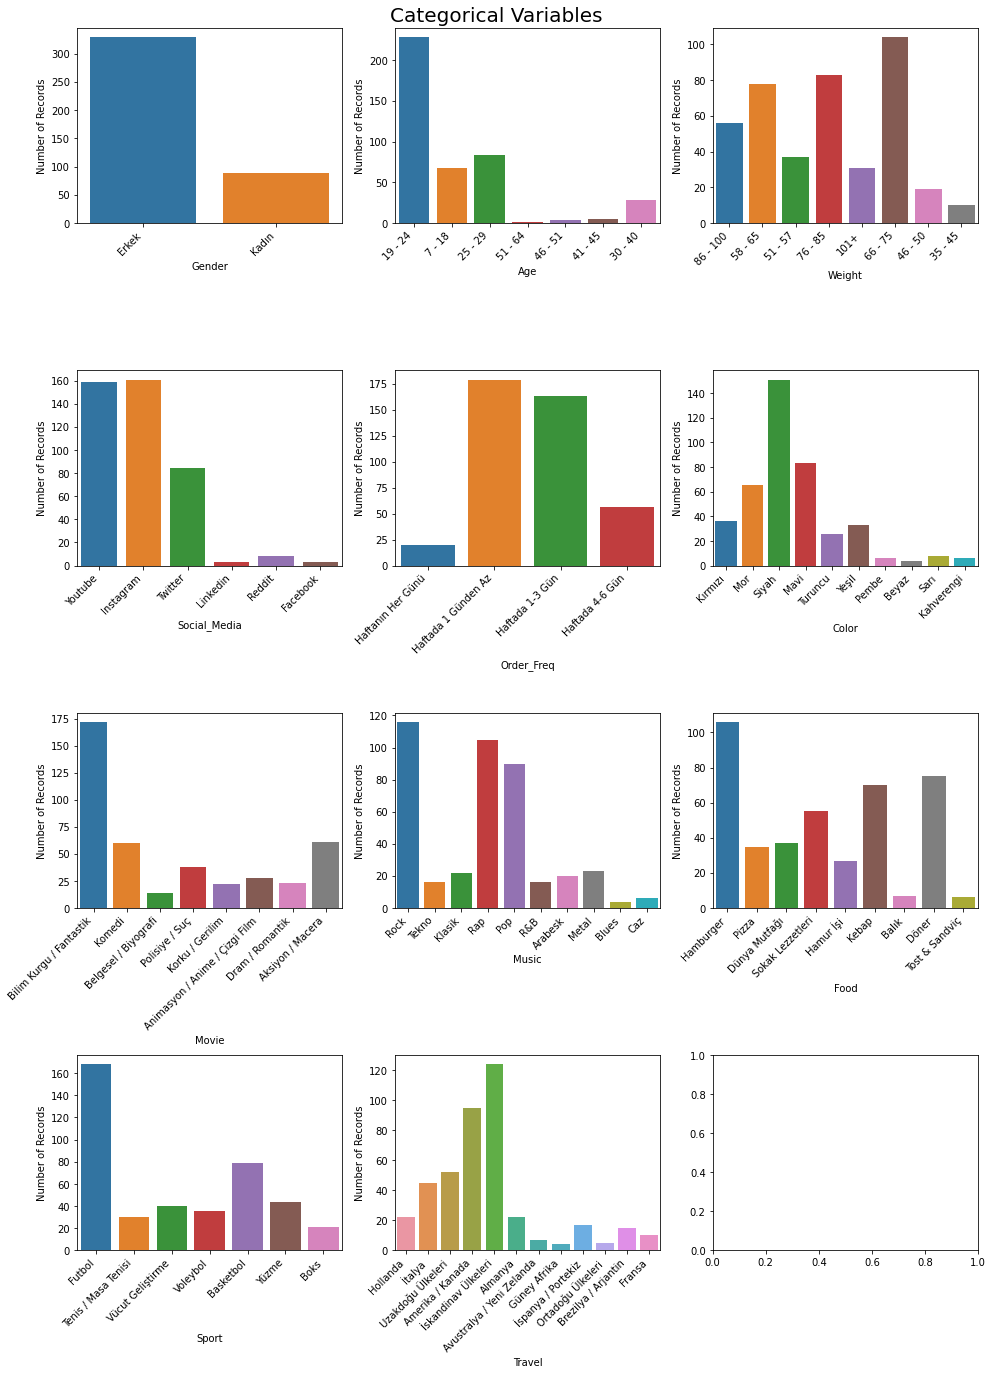

In [93]:
columns = list(df.columns.values) # define column names

fig, ax = plt.subplots(4, 3, figsize=(15, 20))
for col, subplot in zip(columns, ax.flatten()):
    sns.countplot(df[col],ax=subplot)
    subplot.set_xticklabels(rotation=45, horizontalalignment='right', labels=df[col].explode().unique() ) 
    subplot.yaxis.label.set_text("Number of Records")
        
# plot feature distribution
fig.suptitle("Categorical Variables", fontsize=20)
plt.tight_layout(pad=5, w_pad=1, h_pad=1)
plt.show()

# **Bivarite Analysis**

In [94]:
# define columns for prediction
target_columns = ['Erkek','Kadın']

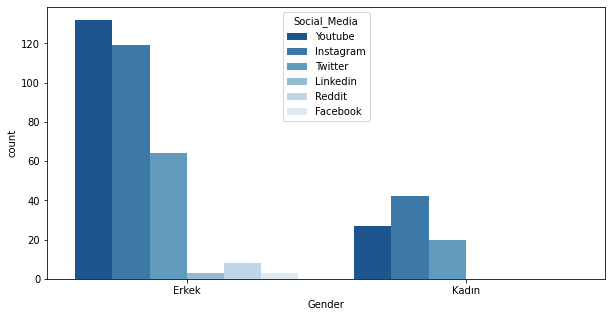

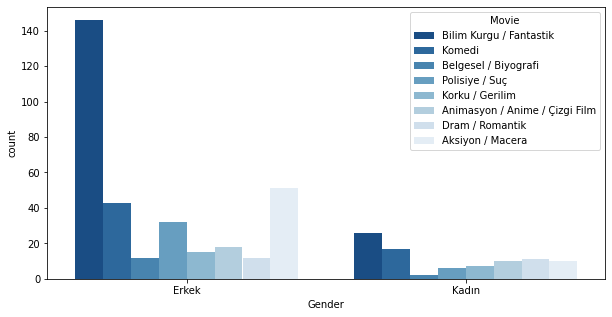

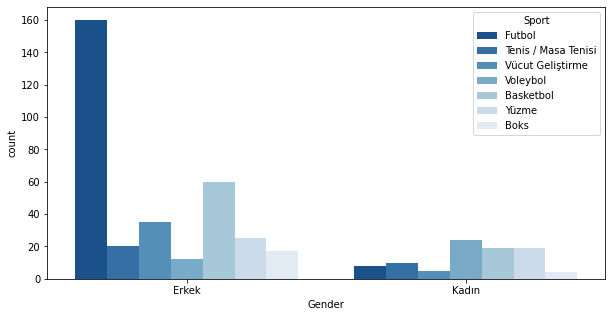

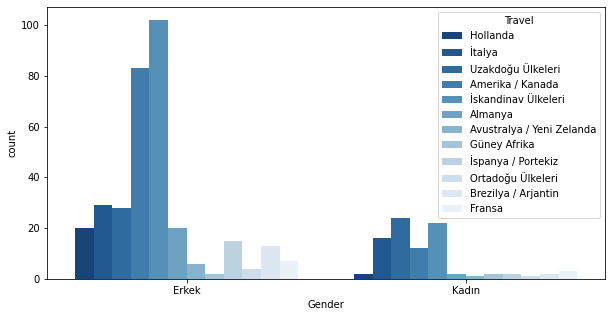

In [95]:
ref = "Gender"
palette = "Blues_r"

hues = ["Social_Media", 'Movie', "Sport", "Travel"]

# plot distribute of feature by gender
for hue in hues:
  plt.figure(figsize = (10, 5))
  sns.countplot(x = ref, hue = hue, data = df, order = target_columns, palette = palette)
  plt.show()

## **Manipulate the Data**

In [96]:
# Manipulate data nominal to ordinal
df_backup = df.copy() # backup for further use

df['Gender'] = df['Gender'].map({'Erkek': 1.0,'Kadın': 0.0})
df['Age'] = df['Age'].map({'7 - 18': 1.0,'19 - 24': 2.0,'25 - 29': 3.0,'30 - 40': 4.0,'41 - 45': 5.0,'46 - 51': 6.0,'51 - 64': 7.0,'65 +': 8.0})
df['Weight'] = df['Weight'].map({'35 - 45': 1.0,'46 - 50': 2.0,'51 - 57': 3.0,'58 - 65': 4.0,'66 - 75': 5.0,'76 - 85': 6.0,'86 - 100': 7.0,'101+': 8.0})
df['Social_Media'] = df['Social_Media'].map({'Instagram': 1.0,'Twitter': 2.0, 'Facebook': 3.0,'Youtube': 4.0, 'Linkedin': 5.0, 'Reddit': 6.0})
df['Order_Freq'] = df['Order_Freq'].map({'Haftada 1 Günden Az': 1.0,'Haftada 1-3 Gün': 2.0, 'Haftada 4-6 Gün': 3.0,'Haftanın Her Günü': 4.0})
df['Color'] = df['Color'].map({'Siyah': 1.0,'Kahverengi': 2.0, 'Kırmızı': 3.0,'Turuncu': 4.0, 'Mavi': 5.0, 'Sarı': 6.0,'Yeşil': 7.0, 'Mor': 8.0, 'Pembe': 9.0,'Beyaz': 10.0})
df['Movie'] = df['Movie'].map({'Aksiyon / Macera': 1.0,'Komedi': 2.0, 'Dram / Romantik': 3.0,'Bilim Kurgu / Fantastik': 4.0, 'Polisiye / Suç': 5.0, 'Animasyon / Anime / Çizgi Film': 6.0,'Belgesel / Biyografi': 7.0, 'Korku / Gerilim': 8.0})
df['Music'] = df['Music'].map({'Pop': 1.0,'Rock': 2.0, 'Rap': 3.0,'Arabesk': 4.0, 'Caz': 5.0,'Klasik': 6.0, 'Metal': 7.0,'R&B': 8.0, 'Blues': 9.0, 'Tekno': 10.0})
df['Food'] = df['Food'].map({'Hamburger': 1.0,'Sokak Lezzetleri': 2.0, 'Döner': 3.0,'Pizza': 4.0, 'Kebap': 5.0,'Tost & Sandviç': 6.0, 'Hamur İşi': 7.0,'Balık': 8.0, 'Dünya Mutfağı': 9.0})
df['Sport'] = df['Sport'].map({'Futbol': 1.0,'Basketbol': 2.0, 'Voleybol': 3.0,'Tenis / Masa Tenisi': 4.0, 'Yüzme': 5.0,'Boks': 6.0, 'Vücut Geliştirme': 7.0})
df['Travel'] = df['Travel'].map({'Almanya': 1.0,'Fransa': 2.0, 'İtalya': 3.0,'İspanya / Portekiz': 4.0, 'Hollanda': 5.0,'İskandinav Ülkeleri': 6.0, 'Amerika / Kanada': 7.0,'Brezilya / Arjantin': 8.0, 'Uzakdoğu Ülkeleri': 9.0, 'Avustralya / Yeni Zelanda': 10.0, 'Kuzey Afrika': 11.0, 'Güney Afrika': 12.0,'Ortadoğu Ülkeleri': 13.0})

df.head()

,Gender,Age,Weight,Social_Media,Order_Freq,Color,Movie,Music,Food,Sport,Travel
0,1.0,2.0,7.0,4.0,4.0,3.0,4.0,2.0,1.0,1.0,5.0
1,0.0,2.0,4.0,1.0,1.0,8.0,2.0,2.0,1.0,4.0,3.0
2,0.0,2.0,3.0,1.0,2.0,1.0,4.0,10.0,4.0,7.0,9.0
3,1.0,1.0,6.0,1.0,1.0,1.0,7.0,2.0,9.0,3.0,3.0
4,1.0,2.0,8.0,4.0,4.0,3.0,5.0,2.0,4.0,2.0,5.0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        418 non-null    float64
 1   Age           418 non-null    float64
 2   Weight        418 non-null    float64
 3   Social_Media  418 non-null    float64
 4   Order_Freq    418 non-null    float64
 5   Color         418 non-null    float64
 6   Movie         418 non-null    float64
 7   Music         418 non-null    float64
 8   Food          418 non-null    float64
 9   Sport         418 non-null    float64
 10  Travel        418 non-null    float64
dtypes: float64(11)
memory usage: 36.0 KB


In [98]:
df_target = df['Gender'].values # prediction value
df_features = df.drop(['Gender'], axis=1) # df except prediction

feature_cols = df_features.columns.values.tolist()

# **Principal Component Analysis**

In [99]:
from sklearn.decomposition import PCA
# step of deciding on the number of components
pca_temp = PCA()
principalComponents = pca_temp.fit_transform(df_features)
print(np.cumsum((pca_temp.explained_variance_ratio_)))

[0.20133288 0.3705898  0.52235528 0.65871483 0.76001191 0.84520167
 0.91185489 0.96177935 0.98267407 1.        ]


In [100]:
pca = PCA(n_components=5)
df_pca = pca.fit_transform(df_features)

# **Feature Importance**

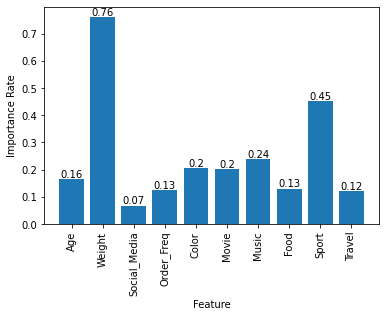

In [101]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import normalize

# define the model
model = DecisionTreeClassifier()

# fit the model
model = model.fit(df_features, df_target)

# get importance
importance = model.feature_importances_

n = list(df_features.columns)
s = normalize([importance.tolist()])[0]
line = plt.bar(n,s)
plt.xlabel('Feature')
plt.ylabel("Importance Rate")

for i in range(len(s)):
    plt.annotate(str(round(s[i], 2)), xy=(n[i],s[i]), ha='center', va='bottom')

plt.xticks(rotation = 90)
plt.show()

# **Train and Test Data Split**

In [102]:
from sklearn.model_selection import train_test_split

# The dataset is split according to the 10-layer cross validation rule.
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.1, random_state=3)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# The dataset is split according to the 10-layer cross validation rule by top 4 feature

important_features_df = df[['Color','Weight','Music','Sport']]

X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(important_features_df, df_target, test_size=0.1, random_state=3)
print ('Train set Imp Fea:', X_train_imp.shape,  y_train_imp.shape)
print ('Test set Imp Fea:', X_test_imp.shape,  y_test_imp.shape)

# Split for PCA

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df_pca, df_target, test_size=0.1, random_state=3)
print ('Train set PCA:', X_train_pca.shape,  y_train_pca.shape)
print ('Test set PCA:', X_test_pca.shape,  y_test_pca.shape)

Train set: (376, 10) (376,)
Test set: (42, 10) (42,)
Train set Imp Fea: (376, 4) (376,)
Test set Imp Fea: (42, 4) (42,)
Train set PCA: (376, 5) (376,)
Test set PCA: (42, 5) (42,)


# **Naive Bayes Classifier**

Test set Accuracy:  0.8809523809523809


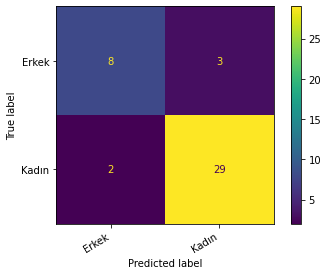

In [103]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score

# Training
clf = GaussianNB()
clf.fit(X_train, y_train)

# Predicting
yhat=(clf.predict(X_test))

# Accuracy evaluation
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

plot_confusion_matrix(clf, X_test, y_test, values_format = '')  
plt.xticks(range(2), target_columns, ha='right', rotation=31)
plt.yticks(range(2), target_columns)
plt.show()

## **K-Fold**

In [104]:
k_fold=KFold(n_splits=10, shuffle=False, random_state=None)
clf = GaussianNB()
cross_val = cross_val_score(clf, df_features, df_target, cv=k_fold, n_jobs=1)
print(cross_val)

[0.80952381 0.88095238 0.83333333 0.85714286 0.85714286 0.83333333
 0.83333333 0.83333333 0.87804878 0.80487805]


In [105]:
print(f'Mean K-Fold:{np.mean(cross_val)}')

Mean K-Fold:0.842102206736353


## **Important Feature Based**

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82        11
         1.0       0.94      0.94      0.94        31

    accuracy                           0.90        42
   macro avg       0.88      0.88      0.88        42
weighted avg       0.90      0.90      0.90        42

Test set Accuracy:  0.9047619047619048


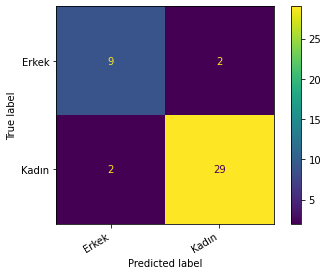

In [106]:
# Training
clf = GaussianNB()
clf.fit(X_train_imp, y_train_imp)

# Predicting
yhat=clf.predict(X_test_imp)

# Accuracy evaluation
print(classification_report(y_test_imp, yhat))
print("Test set Accuracy: ", accuracy_score(y_test_imp, yhat))

plot_confusion_matrix(clf, X_test_imp, y_test_imp, values_format = '')  
plt.xticks(range(2), target_columns, ha='right', rotation=31)
plt.yticks(range(2), target_columns)
plt.show()

## **Principle Component Analysis**

              precision    recall  f1-score   support

         0.0       0.25      0.09      0.13        11
         1.0       0.74      0.90      0.81        31

    accuracy                           0.69        42
   macro avg       0.49      0.50      0.47        42
weighted avg       0.61      0.69      0.63        42

Test set Accuracy:  0.6904761904761905


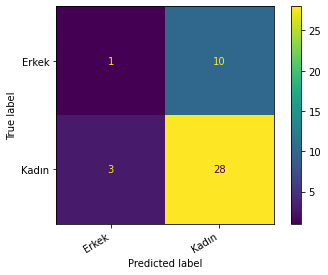

In [107]:
# Training
clf = GaussianNB()
clf.fit(X_train_pca, y_train_pca)

# Predicting
yhat=clf.predict(X_test_pca)

# Accuracy evaluation
print(classification_report(y_test_pca, yhat))
print("Test set Accuracy: ", accuracy_score(y_test_pca, yhat))

plot_confusion_matrix(clf, X_test_pca, y_test_pca, values_format = '')  
plt.xticks(range(2), target_columns, ha='right', rotation=31)
plt.yticks(range(2), target_columns)
plt.show()

# **K Nearest Neighbour**

              precision    recall  f1-score   support

         0.0       0.75      0.55      0.63        11
         1.0       0.85      0.94      0.89        31

    accuracy                           0.83        42
   macro avg       0.80      0.74      0.76        42
weighted avg       0.83      0.83      0.82        42

Test set Accuracy:  0.8333333333333334


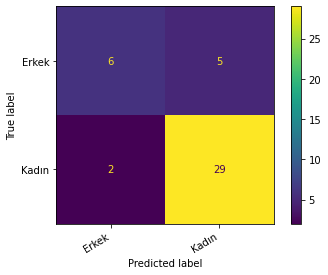

In [108]:
from sklearn.neighbors import KNeighborsClassifier

# Fitting classifier to the Training set
knnclf = KNeighborsClassifier(n_neighbors = 3)
knnclf.fit(X_train, y_train)

# Predicting the Test set results
khat = knnclf.predict(X_test)
#Evaluating the Algorithm
print(classification_report(y_test, khat))
print("Test set Accuracy: ", accuracy_score(y_test, khat))

plot_confusion_matrix(knnclf, X_test, y_test, values_format = '')  
plt.xticks(range(2), target_columns, ha='right', rotation=31)
plt.yticks(range(2), target_columns)
plt.show()

## **K-Fold**

In [109]:
knnclf = KNeighborsClassifier(n_neighbors = 3)
cross_val = cross_val_score(knnclf, df_features, df_target, cv=k_fold, n_jobs=1)
print(cross_val)

[0.64285714 0.83333333 0.71428571 0.78571429 0.95238095 0.85714286
 0.80952381 0.85714286 0.7804878  0.75609756]


In [110]:
print(f'Mean K-Fold:{np.mean(cross_val)}')

Mean K-Fold:0.798896631823461


## **Important Feature Based**

              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78        11
         1.0       0.93      0.90      0.92        31

    accuracy                           0.88        42
   macro avg       0.84      0.86      0.85        42
weighted avg       0.89      0.88      0.88        42

Test set Accuracy:  0.8809523809523809


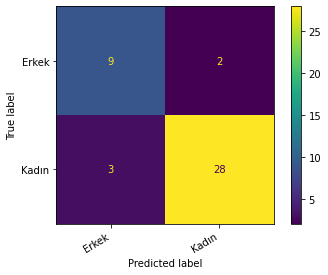

In [111]:
# Fitting classifier to the Training set
knnclf = KNeighborsClassifier(n_neighbors = 3)
knnclf.fit(X_train_imp, y_train_imp)

# Predicting the Test set results
khat = knnclf.predict(X_test_imp)
#Evaluating the Algorithm
print(classification_report(y_test_imp, khat))
print("Test set Accuracy: ", accuracy_score(y_test_imp, khat))

plot_confusion_matrix(knnclf, X_test_imp, y_test_imp, values_format = '')  
plt.xticks(range(2), target_columns, ha='right', rotation=31)
plt.yticks(range(2), target_columns)
plt.show()

## **Principle Component Analysis**

              precision    recall  f1-score   support

         0.0       0.25      0.18      0.21        11
         1.0       0.74      0.81      0.77        31

    accuracy                           0.64        42
   macro avg       0.49      0.49      0.49        42
weighted avg       0.61      0.64      0.62        42

Test set Accuracy:  0.6428571428571429


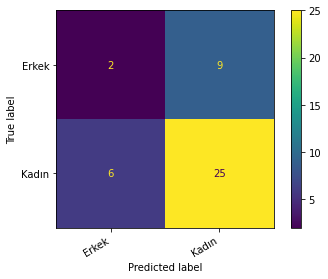

In [112]:
# Fitting classifier to the Training set
knnclf = KNeighborsClassifier(n_neighbors = 3)
knnclf.fit(X_train_pca, y_train_pca)

# Predicting the Test set results
khat = knnclf.predict(X_test_pca)
#Evaluating the Algorithm
print(classification_report(y_test_pca, khat))
print("Test set Accuracy: ", accuracy_score(y_test_pca, khat))

plot_confusion_matrix(knnclf, X_test_pca, y_test_pca, values_format = '')  
plt.xticks(range(2), target_columns, ha='right', rotation=31)
plt.yticks(range(2), target_columns)
plt.show()

# **Random Forest Classification**

              precision    recall  f1-score   support

         0.0       0.86      0.55      0.67        11
         1.0       0.86      0.97      0.91        31

    accuracy                           0.86        42
   macro avg       0.86      0.76      0.79        42
weighted avg       0.86      0.86      0.85        42

Test set Accuracy:  0.8571428571428571


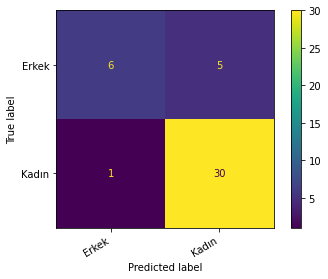

In [113]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=2020)
rfc.fit(X_train, y_train)

rhat = rfc.predict(X_test)

print(classification_report(y_test, rhat))
print("Test set Accuracy: ", accuracy_score(y_test, rhat))

plot_confusion_matrix(rfc, X_test, y_test, values_format = '')  
plt.xticks(range(2), target_columns, ha='right', rotation=31)
plt.yticks(range(2), target_columns)
plt.show()

## **K-Fold**

In [114]:
rfc = RandomForestClassifier(random_state=2020)
cross_val = cross_val_score(rfc, df_features, df_target, cv=k_fold, n_jobs=1)
print(cross_val)

[0.88095238 0.9047619  0.83333333 0.9047619  0.88095238 0.80952381
 0.9047619  0.83333333 0.87804878 0.82926829]


In [115]:
print(f'Mean K-Fold:{np.mean(cross_val)}')

Mean K-Fold:0.8659698025551684


## **Important Feature Based**

              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86        11
         1.0       0.94      0.97      0.95        31

    accuracy                           0.93        42
   macro avg       0.92      0.89      0.90        42
weighted avg       0.93      0.93      0.93        42

Test set Accuracy:  0.9285714285714286


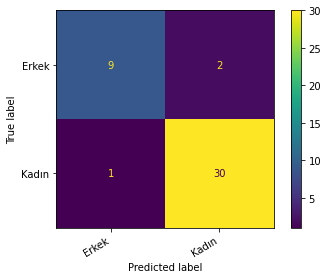

In [116]:
rfc = RandomForestClassifier(random_state=2020)
rfc.fit(X_train_imp, y_train_imp)

rhat = rfc.predict(X_test_imp)

print(classification_report(y_test_imp, rhat))
print("Test set Accuracy: ", accuracy_score(y_test_imp, rhat))

plot_confusion_matrix(rfc, X_test_imp, y_test_imp, values_format = '')  
plt.xticks(range(2), target_columns, ha='right', rotation=31)
plt.yticks(range(2), target_columns)
plt.show()

## **Principle Component Analysis**

              precision    recall  f1-score   support

         0.0       0.40      0.18      0.25        11
         1.0       0.76      0.90      0.82        31

    accuracy                           0.71        42
   macro avg       0.58      0.54      0.54        42
weighted avg       0.66      0.71      0.67        42

Test set Accuracy:  0.7142857142857143


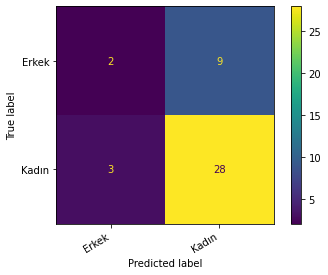

In [117]:
rfc = RandomForestClassifier(random_state=2020)
rfc.fit(X_train_pca, y_train_pca)

rhat = rfc.predict(X_test_pca)

print(classification_report(y_test_pca, rhat))
print("Test set Accuracy: ", accuracy_score(y_test_pca, rhat))

plot_confusion_matrix(rfc, X_test_pca, y_test_pca, values_format = '')  
plt.xticks(range(2), target_columns, ha='right', rotation=31)
plt.yticks(range(2), target_columns)
plt.show()

# **Support Vector Machines**

              precision    recall  f1-score   support

         0.0       1.00      0.36      0.53        11
         1.0       0.82      1.00      0.90        31

    accuracy                           0.83        42
   macro avg       0.91      0.68      0.72        42
weighted avg       0.86      0.83      0.80        42

Test set Accuracy:  0.8333333333333334


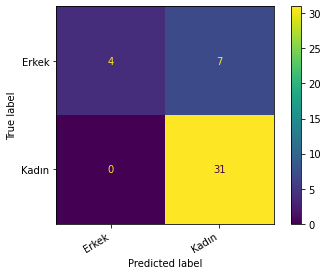

In [118]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

svmhat = svm.predict(X_test)

print(classification_report(y_test, svmhat))
print("Test set Accuracy: ", accuracy_score(y_test, svmhat))

plot_confusion_matrix(svm, X_test, y_test, values_format = '')  
plt.xticks(range(2), target_columns, ha='right', rotation=31)
plt.yticks(range(2), target_columns)
plt.show()

## **K-Fold**

In [119]:
svm=SVC()
cross_val = cross_val_score(svm, df_features, df_target, cv=k_fold, n_jobs=1)
print(cross_val)

[0.73809524 0.88095238 0.76190476 0.80952381 0.88095238 0.85714286
 0.80952381 0.92857143 0.87804878 0.82926829]


In [120]:
print(f'Mean K-Fold:{np.mean(cross_val)}')

Mean K-Fold:0.83739837398374


## **Important Feature Based**

              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86        11
         1.0       0.94      0.97      0.95        31

    accuracy                           0.93        42
   macro avg       0.92      0.89      0.90        42
weighted avg       0.93      0.93      0.93        42

Test set Accuracy:  0.9285714285714286


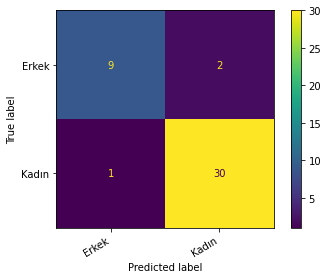

In [121]:
svm = SVC()
svm.fit(X_train_imp, y_train_imp)

svmhat = svm.predict(X_test_imp)

print(classification_report(y_test_imp, svmhat))
print("Test set Accuracy: ", accuracy_score(y_test_imp, svmhat))

plot_confusion_matrix(svm, X_test_imp, y_test_imp, values_format = '')  
plt.xticks(range(2), target_columns, ha='right', rotation=31)
plt.yticks(range(2), target_columns)
plt.show()

## **Principle Component Analysis**

              precision    recall  f1-score   support

         0.0       0.33      0.09      0.14        11
         1.0       0.74      0.94      0.83        31

    accuracy                           0.71        42
   macro avg       0.54      0.51      0.49        42
weighted avg       0.64      0.71      0.65        42

Test set Accuracy:  0.7142857142857143


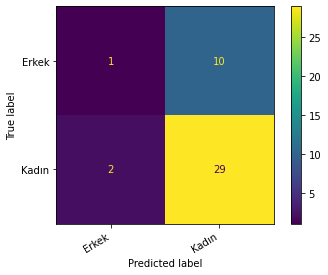

In [122]:
svm = SVC()
svm.fit(X_train_pca, y_train_pca)

svmhat = svm.predict(X_test_pca)

print(classification_report(y_test_pca, svmhat))
print("Test set Accuracy: ", accuracy_score(y_test_pca, svmhat))

plot_confusion_matrix(svm, X_test_pca, y_test_pca, values_format = '')  
plt.xticks(range(2), target_columns, ha='right', rotation=31)
plt.yticks(range(2), target_columns)
plt.show()

# **Decision Tree Classifier**

              precision    recall  f1-score   support

         0.0       0.60      0.55      0.57        11
         1.0       0.84      0.87      0.86        31

    accuracy                           0.79        42
   macro avg       0.72      0.71      0.71        42
weighted avg       0.78      0.79      0.78        42

Test set Accuracy:  0.7857142857142857


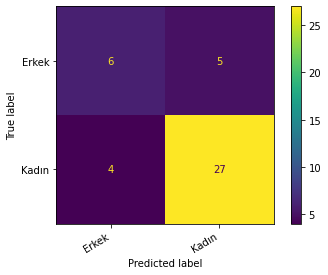

In [123]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

dhat = classifier.predict(X_test)

#Evaluating the Algorithm
print(classification_report(y_test, dhat))
print("Test set Accuracy: ", accuracy_score(y_test, dhat))

plot_confusion_matrix(classifier, X_test, y_test, values_format = '')  
plt.xticks(range(2), target_columns, ha='right', rotation=31)
plt.yticks(range(2), target_columns)
plt.show()

## **K-Fold**

In [124]:
classifier = DecisionTreeClassifier()
cross_val = cross_val_score(classifier, df_features, df_target, cv=k_fold, n_jobs=1)
print(cross_val)

[0.71428571 0.9047619  0.76190476 0.83333333 0.88095238 0.76190476
 0.83333333 0.80952381 0.75609756 0.80487805]


In [125]:
print(f'Mean K-Fold:{np.mean(cross_val)}')

Mean K-Fold:0.8060975609756097


## **Important Feature Based**

              precision    recall  f1-score   support

         0.0       0.90      0.82      0.86        11
         1.0       0.94      0.97      0.95        31

    accuracy                           0.93        42
   macro avg       0.92      0.89      0.90        42
weighted avg       0.93      0.93      0.93        42

Test set Accuracy:  0.9285714285714286


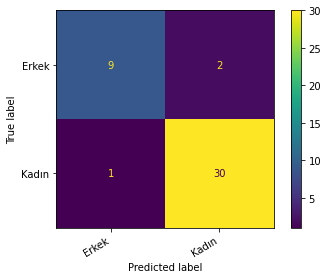

In [126]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_imp, y_train_imp)

dhat = classifier.predict(X_test_imp)

#Evaluating the Algorithm
print(classification_report(y_test_imp, dhat))
print("Test set Accuracy: ", accuracy_score(y_test_imp, dhat))

plot_confusion_matrix(classifier, X_test_imp, y_test_imp, values_format = '')  
plt.xticks(range(2), target_columns, ha='right', rotation=31)
plt.yticks(range(2), target_columns)
plt.show()

## **Principle Component Analysis**

              precision    recall  f1-score   support

         0.0       0.36      0.36      0.36        11
         1.0       0.77      0.77      0.77        31

    accuracy                           0.67        42
   macro avg       0.57      0.57      0.57        42
weighted avg       0.67      0.67      0.67        42

Test set Accuracy:  0.6666666666666666


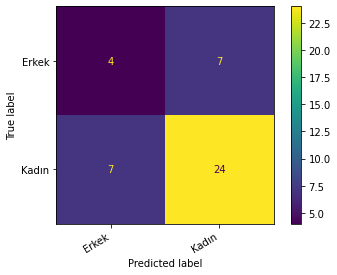

In [127]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_pca, y_train_pca)

dhat = classifier.predict(X_test_pca)

#Evaluating the Algorithm
print(classification_report(y_test_pca, dhat))
print("Test set Accuracy: ", accuracy_score(y_test_pca, dhat))

plot_confusion_matrix(classifier, X_test_pca, y_test_pca, values_format = '')  
plt.xticks(range(2), target_columns, ha='right', rotation=31)
plt.yticks(range(2), target_columns)
plt.show()

# **K - Means Clustering**

In [128]:
from sklearn.cluster import KMeans
from sklearn import metrics

X = df[['Weight', 'Age']]

kmeans = KMeans(n_clusters=2)
y_kmeans = kmeans.fit_predict(X)

metrics.rand_score(df_target, y_kmeans)

0.5190412263490642

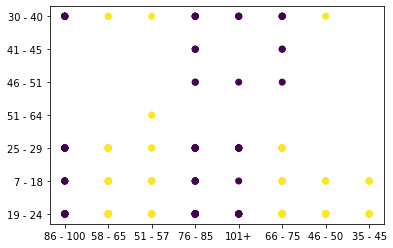

In [129]:
plt.scatter(df_backup['Weight'].values, df_backup['Age'].values, c=y_kmeans)
plt.show()

# **Hierarchical Clustering**

In [130]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='complete')
y_hc=hc.fit_predict(X)

metrics.rand_score(df_target, y_hc)

0.5263502116966714

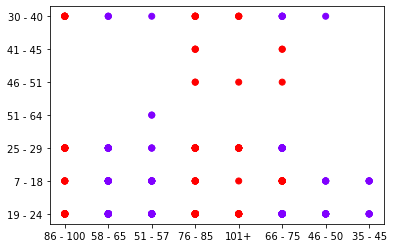

In [131]:
plt.scatter(df_backup['Weight'].values, df_backup['Age'].values, c=y_hc, cmap='rainbow')
plt.show()

# **Agglomerative Clustering**

In [132]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 2)
clusters = agg.fit_predict(X)

metrics.rand_score(df_target, clusters)

0.5128567002857044

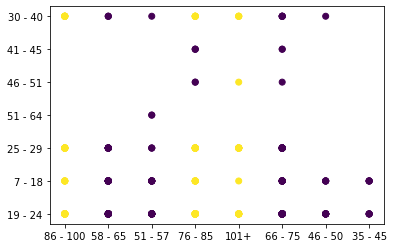

In [133]:
plt.scatter(df_backup['Weight'].values, df_backup['Age'].values, c=clusters)
plt.show()

# **Result Tabel For Classification Accuracy**

| Method | Normal Acc | Important Feature Acc | PCA | K-Fold
| --- | --- | --- | --- | --- |
| Naive Bayes | 0.88 | 0.90 | 0.69 | 0.84
| K Nearest Neighbour | 0.83 | 0.88 | 0.64 | 0.80
| Random Forest | 0.86 | 0.93 | 0.71 | 0.87
| Support Vector Machine | 0.83 | 0.93 | 0.71 | 0.84
| Decision Tree | 0.79 | 0.93 | 0.69 | 0.81

# **Result Tabel For Clustering Accuracy**

| Method | Accuracy |
| --- | --- |
| K - Means | 0.519 |
| Hierarchical | 0.526 |
| Agglomerative | 0.513 |